<a href="https://colab.research.google.com/github/DilemmaLab/Product_Data_Analytics/blob/main/Product_Research_Case_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
login_logs = pd.read_csv('login_logs.csv', sep=",")
sales_orders = pd.read_csv('sales_orders.csv', sep=",")
sales_orders_items = pd.read_csv('sales_orders_items.csv', sep=",")# https://drive.google.com/file/d/1Yv4pgid_qzfy4gBRzntPfnxCUzi2RMMh/view?usp=sharing,
# https://drive.google.com/file/d/1q5n3x-PM2EZj1S9lTD1vk8DHl5I42gPB/view?usp=sharing,
# https://drive.google.com/file/d/1vZR0gYJcXmUpDlbMSUwh0JbBMm8OUT9G/view?usp=sharing

**Задача**: посчитать эффективность работы продукта (т.е. сайта) за последние два года. Оценку необходимо производить через ключевые показатели эффективности:
1.	Прирост покупателей (User Growth Rate)
2.	Churn Rate And Retention Rate
3.	Daily Active User (DAU)
4.	Monthly Active User (MAU)
5.	Наиболее популярные продаваемые товары (Топ-10)
6.	Товары с самым высоким доходом
7.	Объем выручки

Дополнительно он попросил ответить на следующие вопросы:
-  может ли статус заказа повлиять на эффективность компании?
- влияет ли частота входа на сайт повлиять на количество совершаемых заказов?


 **Примечание**:

 В процессе работы над задачей приняты некоторые упрощения, чтобы не усложнять код и также по причине отсутствия некоторых необходимых данных, в частности, поскольку у нас известны только по 1 месяцу июлю за каждый год и мы не имеем в данных флагов первого заказа/первого захода на сайт, мы не пытаемся при оценке новых пользователей использовать понятие реактивировавшихся (ушедших и вернувшихся пользователей) и также **не знаем** фактических **когорт по новым пользователям** (то есть у нас есть возможность увидеть только пользователей на начало месяца без уточнения, новые ли это пользователи или вернувшиеся с предыдущих периодов)

 В качестве библиотеки визуализации решила использовать plotly интерактивную библиотеку и seaborn (как продвинутую версию matplotlib)


##### Входные данные
Отдельно будем использовать для расчета показателей логи авторизации и данные по покупкам

Проведем предварительный краткий EDA и изучим данные:

In [ ]:
login_logs.head()

,login_log_id,user_id,login_time
0,1385328,99160,2021-07-01 00:00:33.0
1,1385329,83272,2021-07-01 00:00:38.0
2,1385330,83272,2021-07-01 00:00:42.0
3,1385331,96640,2021-07-01 00:02:08.0
4,1385332,99160,2021-07-01 00:02:38.0


In [ ]:
login_logs.describe(include=[object, int])

,login_log_id,user_id,login_time
count,3.465720e+05,346572.000000,346572
unique,NaN,NaN,302973
top,NaN,NaN,2021-07-23 04:39:44.0
freq,NaN,NaN,50
mean,2.127851e+06,86920.328624,NaN
std,1.153740e+06,47286.488306,NaN
min,1.385328e+06,972.000000,NaN
25%,1.471971e+06,52784.000000,NaN
50%,1.558614e+06,81768.000000,NaN
75%,1.645256e+06,105748.000000,NaN


In [ ]:
sales_orders.head()

,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time
0,119874,82228,5,Rejected,2021-07-01 00:35:28.0
1,119877,40476,1,Rejected,2021-07-01 02:02:43.0
2,119880,41728,8,Shipped,2021-07-01 02:42:12.0
3,119883,97616,4,Rejected,2021-07-01 02:56:00.0
4,119886,12440,1,Rejected,2021-07-01 03:11:31.0


In [ ]:
sales_orders.describe(include=[object, int])

,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time
count,13630.000000,13630.000000,13630.000000,13630,13630
unique,NaN,NaN,NaN,4,13612
top,NaN,NaN,NaN,Rejected,2022-07-25 05:09:16.0
freq,NaN,NaN,NaN,7663,2
mean,226375.926559,101658.050770,4.725459,NaN,NaN
std,89185.597078,60965.161791,3.385547,NaN,NaN
min,119874.000000,996.000000,1.000000,NaN,NaN
25%,130095.750000,53976.000000,1.000000,NaN,NaN
50%,298528.500000,87884.000000,4.000000,NaN,NaN
75%,308750.250000,143200.000000,8.000000,NaN,NaN


In [ ]:
sales_orders_items.head()

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate
0,62609,7818,119874,1,0,4993.00
1,62610,7607,119877,1,0,6203.40
2,62611,9916,119880,2,2,2904.41
3,62612,11118,119880,2,2,2205.00
4,62613,12702,119880,2,2,2200.85


In [ ]:
sales_orders_items.describe(include=[object, int])

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted
count,20488.000000,20488.000000,20488.000000,20488.000000,20488.000000
mean,111618.299688,8685.166878,222065.659850,3.252538,1.453827
std,42437.427111,3478.256921,89401.468387,14.690323,6.486877
min,62609.000000,335.000000,119874.000000,1.000000,0.000000
25%,67730.750000,7860.000000,129564.000000,1.000000,0.000000
50%,147344.500000,8773.500000,297574.500000,1.000000,0.000000
75%,152466.250000,11131.000000,308100.000000,2.000000,1.000000
max,157588.000000,14469.000000,318972.000000,999.000000,500.000000


## 1.	Прирост покупателей (User Growth Rate)
### 1.1. На основе лога транзакций можно реализовать метрику годового User Growth Rate: сравнение год к году месячного числа покупателей за июль, поскольку у нас только июль 2022 и июль 2021 года


In [ ]:
sales_orders['creation_date']=pd.to_datetime(sales_orders['creation_time']).dt.date
sales_orders['creation_month']=pd.to_datetime(sales_orders['creation_time']).apply(lambda x : x.replace(day=1)).dt.date


In [ ]:
df = sales_orders.groupby(['creation_month'], as_index=False).fk_buyer_id.nunique()
df.head()

,creation_month,fk_buyer_id
0,2021-07-01,2452
1,2022-07-01,2980


In [ ]:
df.shift()

,creation_month,fk_buyer_id
0,None,NaN
1,2021-07-01,2452.0


In [ ]:
pd.merge(df, 100.0*(df.fk_buyer_id/df.shift().fk_buyer_id-1),
         left_index=True,
         right_index=True,
         suffixes = ["","_UGR"]
         ).fillna("-")

,creation_month,fk_buyer_id,fk_buyer_id_UGR
0,2021-07-01,2452,-
1,2022-07-01,2980,21.533442


##### Прирост июль 2022 к июлю 2021 21.53%

Посмотрим на подневный прирост (усложним задачу):

In [ ]:
sales_orders['creation_date'] = pd.to_datetime(sales_orders['creation_time']).dt.date

In [ ]:
df = sales_orders.groupby(['creation_date'], as_index=False).fk_buyer_id.nunique()
df.head()

,creation_date,fk_buyer_id
0,2021-07-01,110
1,2021-07-02,127
2,2021-07-03,116
3,2021-07-04,61
4,2021-07-05,187


In [ ]:
df_chart = pd.merge(df, 100.0*(df.fk_buyer_id/df.shift().fk_buyer_id-1),
         left_index=True,
         right_index=True,
         suffixes = ["","_UGR"]
         ).fillna("-")
del df

In [ ]:
df_chart.head()

,creation_date,fk_buyer_id,fk_buyer_id_UGR,year,date
0,2021-07-01,110,-,2021,01.07
1,2021-07-02,127,15.45,2021,02.07
2,2021-07-03,116,-8.66,2021,03.07
3,2021-07-04,61,-47.41,2021,04.07
4,2021-07-05,187,206.56,2021,05.07


In [ ]:
df_chart['year']=pd.to_datetime(df_chart['creation_date']).dt.year
df_chart['date']=pd.to_datetime(df_chart['creation_date']).dt.strftime('%d.%m')

In [ ]:
import plotly.express as px
fig = px.line(df_chart,
              x='date',color='year', y="fk_buyer_id_UGR")
fig.show()

##### График прироста день ко дню в 2021 и 2022 годах:
можно видеть прирост и сезонность - всплески по Понедельникам

## 2.	Churn Rate And Retention Rate





### 2.1. На основе лога авторизаций
можно реализовать метрику оттока и retention для аудитории в режиме сравнения Y-o-Y, начиная от 01.07 для 2021 и 2022 отдельно для впервые зашедших, или для когорты 01.07.2021 на протяжении 2021 и 2022, поскольку в логе указан один месяц для каждого года, при этом возможно реализовать метрику оттока и retention для DAU D-o-D (день ко дню) и для DAU и для WAU на начало и конца месяца или недели

Чтобы не загромождать исследование, покажем на примерах DAU для Y-o-Y (это позволить сделать выводы, стал ли интенсивнее отток или повысилась ли возвращаемость в июле 2022 по сравнению с 2021)

In [ ]:
login_logs['login_date'] = pd.to_datetime(login_logs['login_time']).dt.date
login_logs['login_date'].agg([max, min])

max    2022-07-30
min    2021-07-01
Name: login_date, dtype: object

Сформируем даты для расчетов и визуализаций:

In [ ]:
login_logs['login_date']=pd.to_datetime(login_logs['login_date']).dt.date
login_logs['login_month']=pd.to_datetime(login_logs['login_date']).apply(lambda x : x.replace(day=1)).dt.date.astype(str)
login_logs['year']=pd.to_datetime(login_logs['login_date']).dt.year
login_logs['date']=pd.to_datetime(login_logs['login_date']).dt.strftime('%d.%m')

##### Существует 2 формулы расчета Churn Rate:

*   Отток без учета новых пользователей, пришедших за период:
> Churn = (AU_start_period - AU_end_period)/AU_start_period*100.0

*   Отток с учетом новых пользователей, пришедших за период или фактически  1-RR (отток в когорте):
>Churn_with_new_users = (AU_start_period + NU_period  - AU_end_period)/AU_start_period*100.0


где
> AU_start_period  - WAU/ DAU/ MAU активная аудитория на начало периода

> NU_period   -  новые WAU/ DAU/ MAU вновь пришедшая аудитория за период

> AU_end_period  - WAU/ DAU/ MAU активная аудитория на конец периода

Применим обе в процессе расчетов и посмотрим на различия

Также в процессе расчетов будем учитывать ограничения, описанные в примечании в начале ноутбука:

1) Важно понимать,  что поскольку у нас только только по 1 месяцу июлю за каждый год и мы не имеем в данных флагов первого заказа/первого захода на сайт, то гороворить про понятие новых пользователей возможно только как про новых относительно первого периода оценки (дня для DAU, недели для WAU)

2) Чтобы оценка за 2021 и 2022 годы была согласованной, из "новых" пользователей 2022 года не вычитаются пользователи 2021 года (поскольку для 2021 года мы не знаем фактических новых и фактических вернувшихся после 2020)



Сформируем датасет pd.DataFrame() с метриками (можно было воспользоваться и словарем, решено использовать pd.DataFrame()  для единообразия)

In [ ]:
d_metrics = pd.DataFrame({"year":[2022, 2021]})

for year in d_metrics['year']:
  first_dt_dau = login_logs[login_logs['login_date'].astype(str)==
                            f"{year}-07-01"].user_id.drop_duplicates()
  last_dt_dau_7d = login_logs[login_logs['login_date'].astype(str)==
                            f"{year}-07-07"].user_id.drop_duplicates()
  last_dt_dau_1m = login_logs[login_logs['login_date'].astype(str)==
                            f"{year}-07-30"].user_id.drop_duplicates()

  returned_dau_7d = last_dt_dau_7d.isin(first_dt_dau).sum()
  returned_dau_1m = last_dt_dau_1m.isin(first_dt_dau).sum()

  new_dau_7d = (~last_dt_dau_7d.isin(first_dt_dau)).sum()
  new_dau_1m = (~last_dt_dau_1m.isin(first_dt_dau)).sum()

  d_metrics.loc[d_metrics["year"]==year,"Churn 7d"] \
                  = round((first_dt_dau.nunique() - last_dt_dau_7d.nunique())/
                    first_dt_dau.nunique()*100.0,2)
  d_metrics.loc[d_metrics["year"]==year,"Churn Monthly"] \
                  = round((first_dt_dau.nunique() - last_dt_dau_1m.nunique())/
                    first_dt_dau.nunique()*100.0,2)

  d_metrics.loc[d_metrics["year"]==year,
                "Churn 7d в когорте   (с учетом новых пользователей)"] \
                = round((first_dt_dau.nunique() \
                         + new_dau_7d - last_dt_dau_7d.nunique())/
                    first_dt_dau.nunique()*100.0,2)
  d_metrics.loc[d_metrics["year"]==year,
                "Churn Monthly в когорте   (с учетом новых пользователей)"] \
                = round((first_dt_dau.nunique() \
                         + new_dau_1m - last_dt_dau_1m.nunique())/
                    first_dt_dau.nunique()*100.0,2)

  d_metrics.loc[d_metrics["year"]==year,"Retention 7d"] \
    = round(returned_dau_7d/first_dt_dau.nunique()*100.0, 2)
  d_metrics.loc[d_metrics["year"]==year,"Retention Monthly"] \
    = round(returned_dau_1m/first_dt_dau.nunique()*100.0, 2)

  d_metrics.loc[d_metrics["year"]==year,"Retention 7d"] \
    = round(returned_dau_7d/first_dt_dau.nunique()*100.0, 2)
  d_metrics.loc[d_metrics["year"]==year,"Retention Monthly"] \
    = round(returned_dau_1m/first_dt_dau.nunique()*100.0, 2)

  d_metrics.loc[d_metrics["year"]==year,"New users to Churned 7d"]  \
  = round(new_dau_7d/(~first_dt_dau.isin(last_dt_dau_7d)).sum()*100.0, 2)
  d_metrics.loc[d_metrics["year"]==year,"New users to Churned Monthly"] \
  = round(new_dau_1m/(~first_dt_dau.isin(last_dt_dau_1m)).sum()*100.0, 2)


##### Отток и retention rate DAU в 2022 и 2021 годах, %:

In [ ]:
d_metrics.iloc[:,:-2].head()

,year,Churn 7d,Churn Monthly,Churn 7d в когорте (с учетом новых пользователей),Churn Monthly в когорте (с учетом новых пользователей),Retention 7d,Retention Monthly
0,2022,-23.01000,-3.47000,58.56000,68.02000,41.44000,31.98000
1,2021,2.37000,2.24000,66.22000,72.68000,33.78000,27.32000


Отток (до вычета новых пользователей) стал отрицательным в 2022 и когортный отток снизился, в то время как retention вырос, значит: прирост "новых" и возросший retention стали компенсировать в течении месяца  отток

Действительно, соотношение новых за период к оттекшим с начала периода сильно выросло:

In [ ]:
d_metrics.iloc[:,[0,-2,-1]].head()

,year,New users to Churned 7d,New users to Churned Monthly
0,2022,139.29000,105.11000
1,2021,96.43000,96.92000


Наблюдаются следующие прирост Retention Rate и падение Churn Rate, и также отношения новых за период к оттекшим с начала периода, **процентные пункты**:

In [ ]:
(d_metrics[d_metrics.columns[1:]]-d_metrics[d_metrics.columns[1:]].shift(-1)).iloc[0,:]

Churn 7d                                                    -25.38000
Churn Monthly                                                -5.71000
Churn 7d в когорте   (с учетом новых пользователей)          -7.66000
Churn Monthly в когорте   (с учетом новых пользователей)     -4.66000
Retention 7d                                                  7.66000
Retention Monthly                                             4.66000
New users to Churned 7d                                      42.86000
New users to Churned Monthly                                  8.19000
Name: 0, dtype: float64

##### Графики RR, %:
Построим графики подневного RR день ко дню:

In [ ]:
dau_daily = pd.DataFrame()

for year in [2021,2022]:
  first_dt_dau = login_logs[login_logs['login_date'].astype(str)==
                            f"{year}-07-01"].user_id.drop_duplicates()
  dau_daily\
     = pd.concat([dau_daily, login_logs[(login_logs['user_id'].isin(first_dt_dau))&
                         (login_logs['year']==year)]\
                          .groupby(['login_date','year','date'], as_index=False)\
                          .user_id.nunique()])
  dau_daily.loc[dau_daily["year"]==year,"user_id"]\
     =dau_daily.loc[dau_daily["year"]==year,"user_id"]/first_dt_dau.nunique()*100.0
# pd.set_option('display.float_format', lambda x: ' %.2f' % x)
fig = px.line(dau_daily,
              x='date', color="year", y="user_id")
fig.show()
del fig

Действительно, произошло повышение RR в 2022 году относительно 2021, вновь можно видеть сезонность - падение посещаемости сайта по Воскресеньям

##### Построим графики DAU в абсолютах:

In [ ]:
dau_daily = pd.DataFrame()

for year in [2021,2022]:
  first_dt_dau = login_logs[login_logs['login_date'].astype(str)==
                            f"{year}-07-01"].user_id.drop_duplicates()
  dau_daily\
     = pd.concat([dau_daily, login_logs[(login_logs['user_id'].isin(first_dt_dau))&
                         (login_logs['year']==year)]\
                          .groupby(['login_date','year','date'], as_index=False)\
                          .user_id.nunique()])
fig = px.line(dau_daily,
              x='date', color="year", y="user_id")
fig.show()
del fig

Повышение DAU в 2022 году относительно 2021 произошло также и в абсолютных значениях


### 2.2. Проведем теперь исследование количества покупателей, или активной платящей аудитодии
с целью выяснить, повысились ли метрики количества платящих пользователей и их RR вместе с DAU и RR DAU (если активные пользователи сайта растут, но платящая аудитория падает,  нужно исследовать причины и решать, что делать: если с активной платящей аудиторией падает выручка, это негатиный тренд для продукта)

Исследовать будем все заказы (не только те, которые находятся в статусе доставленных)

In [ ]:
sales_orders['creation_date']=pd.to_datetime(sales_orders['creation_time']).dt.date
sales_orders['creation_month']=pd.to_datetime(sales_orders['creation_time']).apply(lambda x : x.replace(day=1)).dt.date

sales_orders['year']=pd.to_datetime(sales_orders['creation_time']).dt.year
sales_orders['date']=pd.to_datetime(sales_orders['creation_time']).dt.strftime('%d.%m')

In [ ]:
sales_orders['creation_date'].agg([min,max])

min    2021-07-01
max    2022-07-30
Name: creation_date, dtype: object

In [ ]:
d_metrics = pd.DataFrame({"year":[2022, 2021]})

for year in d_metrics['year']:
  first_dt_dau = sales_orders[sales_orders['creation_date'].astype(str)==
                            f"{year}-07-01"].fk_buyer_id.drop_duplicates()
  last_dt_dau_7d = sales_orders[sales_orders['creation_date'].astype(str)==
                            f"{year}-07-07"].fk_buyer_id.drop_duplicates()
  last_dt_dau_1m = sales_orders[sales_orders['creation_date'].astype(str)==
                            f"{year}-07-30"].fk_buyer_id.drop_duplicates()

  returned_dau_7d = last_dt_dau_7d.isin(first_dt_dau).sum()
  returned_dau_1m = last_dt_dau_1m.isin(first_dt_dau).sum()

  new_dau_7d = (~last_dt_dau_7d.isin(first_dt_dau)).sum()
  new_dau_1m = (~last_dt_dau_1m.isin(first_dt_dau)).sum()

  d_metrics.loc[d_metrics["year"]==year,"Churn 7d"] \
                  = round((first_dt_dau.nunique() - last_dt_dau_7d.nunique())/
                    first_dt_dau.nunique()*100.0,2)
  d_metrics.loc[d_metrics["year"]==year,"Churn Monthly"] \
                  = round((first_dt_dau.nunique() - last_dt_dau_1m.nunique())/
                    first_dt_dau.nunique()*100.0,2)

  d_metrics.loc[d_metrics["year"]==year,
                "Churn 7d в когорте   (с учетом новых за период)"] \
                = round((first_dt_dau.nunique() \
                         + new_dau_7d - last_dt_dau_7d.nunique())/
                    first_dt_dau.nunique()*100.0,2)
  d_metrics.loc[d_metrics["year"]==year,
                "Churn Monthly в когорте   (с учетом новых за период)"] \
                = round((first_dt_dau.nunique() \
                         + new_dau_1m - last_dt_dau_1m.nunique())/
                    first_dt_dau.nunique()*100.0,2)

  d_metrics.loc[d_metrics["year"]==year,"Retention 7d"] \
    = round(returned_dau_7d/first_dt_dau.nunique()*100.0, 2)
  d_metrics.loc[d_metrics["year"]==year,"Retention Monthly"] \
    = round(returned_dau_1m/first_dt_dau.nunique()*100.0, 2)

  d_metrics.loc[d_metrics["year"]==year,"Retention 7d"] \
    = round(returned_dau_7d/first_dt_dau.nunique()*100.0, 2)
  d_metrics.loc[d_metrics["year"]==year,"Retention Monthly"] \
    = round(returned_dau_1m/first_dt_dau.nunique()*100.0, 2)

  d_metrics.loc[d_metrics["year"]==year,"New buyers to Churned 7d"]  \
  = round(new_dau_7d/(~first_dt_dau.isin(last_dt_dau_7d)).sum()*100.0, 2)
  d_metrics.loc[d_metrics["year"]==year,"New buyers to Churned Monthly"] \
  = round(new_dau_1m/(~first_dt_dau.isin(last_dt_dau_1m)).sum()*100.0, 2)


##### Отток и retenrion rate покупателей в 2022 и 2021 года, %
Отток покупателей в 2022 (включая и когортный отток покупателей) увеличился, в то время как retention упал, значит **стали хуже удерживать покупателей** несмотря на то, что аудиторию заходящих на сайт пользователей стали лучше удерживать


In [ ]:
d_metrics.iloc[:,:-2].head()

,year,Churn 7d,Churn Monthly,Churn 7d в когорте (с учетом новых за период),Churn Monthly в когорте (с учетом новых за период),Retention 7d,Retention Monthly
0,2022,-43.36,-19.58,92.31,96.50,7.69,3.50
1,2021,-63.64,-66.36,90.00,95.45,10.00,4.55



Действительно, соотношение новых за период к оттекшим с начала периода снизилось:

In [ ]:
d_metrics.iloc[:,[0,-2,-1]].head()

,year,New buyers to Churned 7d,New buyers to Churned Monthly
0,2022,146.97,120.29
1,2021,170.71,169.52



Наблюдаются следующие падение Retention Rate и увеличение Churn Rate, и также снижение отношения новых за период к оттекшим с начала периода, **процентные пункты**:


In [ ]:
(d_metrics[d_metrics.columns[1:]]-d_metrics[d_metrics.columns[1:]].shift(-1)).iloc[0,:]

Churn 7d                                                     20.28
Churn Monthly                                                46.78
Churn 7d в когорте   (с учетом новых пользователей)           2.31
Churn Monthly в когорте   (с учетом новых пользователей)      1.05
Retention 7d                                                 -2.31
Retention Monthly                                            -1.05
New users to Churned 7d                                     -23.74
New users to Churned Monthly                                -49.23
Name: 0, dtype: float64

##### Графики RR покупателей в абсолютах и %:

In [ ]:
buyers_daily = pd.DataFrame()

for year in [2021,2022]:
  first_dt_dau = sales_orders[sales_orders['creation_date'].astype(str)==
                            f"{year}-07-01"].fk_buyer_id.drop_duplicates()
  buyers_daily\
     = pd.concat([buyers_daily, sales_orders[(sales_orders['fk_buyer_id'].isin(first_dt_dau))&
                         (sales_orders['year']==year)]\
                          .groupby(['creation_date','year','date'], as_index=False)\
                          .fk_buyer_id.nunique()])
  buyers_daily.loc[buyers_daily["year"]==year,"fk_buyer_id"]\
     =buyers_daily.loc[buyers_daily["year"]==year,"fk_buyer_id"]/first_dt_dau.nunique()*100.0
# pd.set_option('display.float_format', lambda x: ' %.2f' % x)
fig = px.line(buyers_daily,
              x='date', color="year", y="fk_buyer_id")
fig.show()
del fig

In [ ]:
buyers_daily = pd.DataFrame()

for year in [2021,2022]:
  first_dt_dau = sales_orders[sales_orders['creation_date'].astype(str)==
                            f"{year}-07-01"].fk_buyer_id.drop_duplicates()
  buyers_daily\
     = pd.concat([buyers_daily, sales_orders[(sales_orders['fk_buyer_id'].isin(first_dt_dau))&
                         (sales_orders['year']==year)]\
                          .groupby(['creation_date','year','date'], as_index=False)\
                          .fk_buyer_id.nunique()])
fig = px.line(buyers_daily,
              x='date', color="year", y="fk_buyer_id")
fig.show()
del fig

##### Рекомендации для аналитика:
поскольку на графиках видно, что тренд прироста количества покупателей в 2022 году к 2021 не четко выражен, выраженного стабильного преобладания не наблюдается, рекомендуется проверить на статистическую значимость (к примеру, при помощи bootstrap-метода и проверки p-value эфроновским подсчетом)  

## 3.	Daily Active User (DAU)


### 3.1. На основе лога авторизаций

In [ ]:
login_logs['login_time'].agg([min, max])

min    2021-07-01 00:00:33.0
max    2022-07-30 23:51:37.0
Name: login_time, dtype: object

##### График DAU:

In [ ]:
dau_daily = pd.DataFrame()

for year in [2021,2022]:
  first_dt_dau = login_logs[login_logs['login_date'].astype(str)==
                            f"{year}-07-01"].user_id.drop_duplicates()
  dau_daily\
     = pd.concat([dau_daily, login_logs[(login_logs['user_id'].isin(first_dt_dau))&
                         (login_logs['year']==year)]\
                          .groupby(['login_date','year','date'], as_index=False)\
                          .user_id.nunique()])
fig = px.line(dau_daily,
              x='date', color="year", y="user_id")
fig.show()
del fig



##### Средний DAU за месяц, а также минимальный и максимальный DAU за месяц:

In [ ]:
dau_daily.groupby(['year'], as_index=False)['user_id'].agg(['min', 'mean', 'max']).round()

,min,mean,max
year,,,
2021,333,512.00,1563
2022,548,785.00,2073


##### Прирост среднего DAU Y-o-Y **%**:

In [ ]:
((dau_daily.groupby(['year'], as_index=False)['user_id'].mean()/\
dau_daily.groupby(['year'], as_index=False)['user_id'].mean().shift()-1)*100.0).iloc[1,1].round(2)

53.36

### 3.2. На основе лога транзакций

##### График ежедневного количества покупателей:

In [ ]:
buyers_daily = pd.DataFrame()

for year in [2021,2022]:
  first_dt_dau = sales_orders[sales_orders['creation_date'].astype(str)==
                            f"{year}-07-01"].fk_buyer_id.drop_duplicates()
  buyers_daily\
     = pd.concat([buyers_daily, sales_orders[(sales_orders['fk_buyer_id'].isin(first_dt_dau))&
                         (sales_orders['year']==year)]\
                          .groupby(['creation_date','year','date'], as_index=False)\
                          .fk_buyer_id.nunique()])
fig = px.line(buyers_daily,
              x='date', color="year", y="fk_buyer_id")
fig.show()
del fig

##### Среднее, минимальное и максимальное суточное число покупателей за месяц за месяц:

In [ ]:
buyers_daily.groupby(['year'], as_index=False)['fk_buyer_id'].agg(['min', 'mean', 'max'])

,min,mean,max
year,,,
2021,1,10.41,110
2022,1,12.23,143


##### Прирост среднего суточного количества покупателей Y-o-Y **%**:

In [ ]:
((buyers_daily.groupby(['year'], as_index=False)['fk_buyer_id'].mean()/\
buyers_daily.groupby(['year'], as_index=False)['fk_buyer_id'].mean().shift()-1)*100.0).iloc[1,1].round(2)

17.47

## 4.	Monthly Active User (MAU)

### 4.1. На основе лога авторизаций
### реализовать метрику для MAU
### возможно только за один месяц каждого года - июль 2021 и июль 2022

In [ ]:

login_logs.groupby(['login_month'], as_index=False).user_id.nunique()


,login_month,user_id
0,2021-07-01,10867
1,2022-07-01,13022


##### Прирост MAU Y-o-Y, %:

In [ ]:
df = login_logs.groupby(['login_month'], as_index=False).user_id.nunique()
((df.user_id/df.user_id.shift()-1)*100.0)[1].round(2)

19.83

#### 4.2. Кроме метрики MAU подсчитаем количество активных покупателей На основе лога транзакций

In [ ]:
sales_orders.groupby(['creation_month'], as_index=False).fk_buyer_id.nunique()


,creation_month,fk_buyer_id
0,2021-07-01,2452
1,2022-07-01,2980


##### Прирост месячного числа покупателей Y-o-Y, %:

In [ ]:
df = sales_orders.groupby(['creation_month'], as_index=False).fk_buyer_id.nunique()
((df.fk_buyer_id/df.fk_buyer_id.shift()-1)*100.0)[1].round(2)

21.53

## 5.	Наиболее популярные продаваемые товары (Топ-10)

### 5.1. За месяц


#### 5.1.1. По объему продаж (покажет, насколько много нужно товара на складах)


###### a) Рассматриваем заказанные и фактически доставленные (то есть c учетом доставленного количества)

In [ ]:

df = pd.merge(sales_orders_items, sales_orders, left_on=['fk_order_id'], right_on=['order_id'])
top = df[df['sales_order_status']=='Shipped']\
          .groupby(['fk_product_id'], as_index = False)\
          .order_quantity_accepted.sum()
top.sort_values(by=['order_quantity_accepted'], ascending=False).head(10)\
          .rename(columns={'fk_product_id': 'Артикул товара'}).reset_index(drop=True)

,Артикул товара,order_quantity_accepted
0,10235,1603
1,12547,1572
2,8219,1478
3,8444,1410
4,8428,1146
5,8221,1086
6,3610,920
7,12652,884
8,8210,651
9,7640,607


In [ ]:
df = pd.merge(sales_orders_items, sales_orders, left_on=['fk_order_id'], right_on=['order_id'])
top = df[df['sales_order_status']=='Shipped']\
          .groupby(['fk_product_id'], as_index=False)\
          .order_quantity_accepted.sum()
top.sort_values(by=['order_quantity_accepted'], ascending=False).head(10)

,fk_product_id,order_quantity_accepted
274,10235,1603
391,12547,1572
144,8219,1478
199,8444,1410
190,8428,1146
145,8221,1086
32,3610,920
392,12652,884
142,8210,651
78,7640,607


###### b) Рассматриваем заказанные и фактически доставленные и заказанные, но не доставленные по факту, то есть:
 * без учета доставленного количества,
 с учетом всего количества, которое было в заказе
 * все кроме Rejected - исключаются только те, от которых отказались

In [ ]:
top = df[df['sales_order_status']!='Rejected']\
          .groupby(['fk_product_id'], as_index = False)\
          .ordered_quantity.sum()
top.sort_values(by=['ordered_quantity'], ascending=False).head(10)\
          .rename(columns={'fk_product_id': 'Артикул товара'}).reset_index(drop=True)

,Артикул товара,ordered_quantity
0,10235,1665
1,12547,1617
2,8219,1506
3,8444,1446
4,8428,1199
5,8221,1198
6,3610,946
7,12652,899
8,8210,669
9,9925,632


#### 5.1.2. По частоте появления в заказах
**Цель**: данная метрика покажет, что чаще заказывают, даже в небольших количествах - это товар,

который пользуется популярность и который можно использовать даже для перекрестных продаж

Рассматриваем все, кроме Rejected (тех, от которых отказались)




In [ ]:
top = df[df['sales_order_status']!='Rejected']\
      .groupby(['fk_product_id'], as_index=False).order_id.nunique()
top.sort_values(by=['order_id'], ascending=False).head(10)\
          .rename(columns={'fk_product_id': 'Артикул товара'}).reset_index(drop=True)

,Артикул товара,order_id
0,10235,336
1,8444,236
2,3610,234
3,8425,193
4,10975,175
5,1041,174
6,8219,168
7,12652,144
8,8210,134
9,10236,134



### 5.2. Подневная динамика и недельная динамика может быть рассчитана аналогично
Поскольку в данной задаче это не нужно, опустим данный расчет

## 6.	Товары с самым высоким доходом

Примем за доход **выручку от фактической продажи** товара за период в 1 месяц (**не** цену и **не** цену за вычетом операционных и маркетинговых избержек) с учетом **фактически доставленных**
Выберем Топ-10

In [ ]:
df = pd.merge(sales_orders_items, sales_orders, left_on='fk_order_id', right_on='order_id')
df['creation_month']=pd.to_datetime(df['creation_time']).apply(lambda x : x.replace(day=1)).dt.date
df[df['sales_order_status']=='Shipped']\
          .groupby(['fk_product_id'], as_index=False)\
          .order_quantity_accepted.sum()\
          .sort_values(by=['order_quantity_accepted'], ascending=False)\
          .head(10).reset_index(drop=True)\
          .rename(columns={'fk_product_id': 'Артикул товара'})

,Артикул товара,order_quantity_accepted
0,10235,1603
1,12547,1572
2,8219,1478
3,8444,1410
4,8428,1146
5,8221,1086
6,3610,920
7,12652,884
8,8210,651
9,7640,607


## 7.	Объем выручки

Вначале проведем EDA статусов заказов

In [ ]:
sales_orders['sales_order_status'].unique()

array(['Rejected', 'Shipped', 'Pending', 'Review'], dtype=object)

In [ ]:
df = sales_orders_items.merge(sales_orders, left_on='fk_order_id', right_on='order_id')
df['creation_date']=pd.to_datetime(df['creation_time']).dt.date
df['creation_month']=pd.to_datetime(df['creation_time']).apply(lambda x : x.replace(day=1)).dt.date
df.head()

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time,creation_date,creation_month,year,date
0,62609,7818,119874,1,0,4993.00,119874,82228,5,Rejected,2021-07-01 00:35:28.0,2021-07-01,2021-07-01,2021,01.07
1,62610,7607,119877,1,0,6203.40,119877,40476,1,Rejected,2021-07-01 02:02:43.0,2021-07-01,2021-07-01,2021,01.07
2,62611,9916,119880,2,2,2904.41,119880,41728,8,Shipped,2021-07-01 02:42:12.0,2021-07-01,2021-07-01,2021,01.07
3,62612,11118,119880,2,2,2205.00,119880,41728,8,Shipped,2021-07-01 02:42:12.0,2021-07-01,2021-07-01,2021,01.07
4,62613,12702,119880,2,2,2200.85,119880,41728,8,Shipped,2021-07-01 02:42:12.0,2021-07-01,2021-07-01,2021,01.07


In [ ]:
df[(~df['sales_order_status'].isin(["Shipped", "Pending"]))&(df['order_quantity_accepted']!=0)].shape[0]

9

Видим, что есть отклоненные заказы с order_quantity_accepted (количество единиц товара, доставленных покупателю) > 0 => наша задача убрать такие заказы, оставив только доставленные (ожидающие доставки покажем отдельно)

In [ ]:
df['amount'] = sales_orders_items.apply(lambda item:
                                              item['rate']*item['order_quantity_accepted'],
                                              axis = 1
                                              )

In [ ]:
# pd.option_context('display.float_format', '{:,.20f}'.format)
pd.set_option('display.float_format', lambda x: ' %.2f' % x)
df_pivot = df[df['sales_order_status'].isin(["Shipped", "Pending"])].groupby(['creation_month','sales_order_status'], as_index=False).amount.sum()
pd.pivot_table(df_pivot, values=['amount'], index=['creation_month'], columns=['sales_order_status'])

amount              
sales_order_status     Pending       Shipped
creation_month                              
2021-07-01           179256.13   60136714.84
2022-07-01          1689181.00  115089176.30

In [ ]:
pd.set_option('display.float_format', lambda x: ' %.5f' % x)
df_pivot[df_pivot['sales_order_status']=='Shipped']['amount']\
/df_pivot[df_pivot['sales_order_status']=='Shipped']['amount'].shift()

1        NaN
3    1.91379
Name: amount, dtype: float64


  Объем выручки по доставленным заказам за июль 2021 года 60 136 714.84 и за июль 2022 115 089 176.30 , вырос в 1,91 раза
  
  В статусе ожидания заказы на 179 256.13 за июль 2021 и 1 689 181.00 за июль 2022

Предположим, что у нас предоплатная система расчетов и даже если от товара отказались/не доставили заказ (то есть статус Rejected или Review), то деньги , заплаченные покупателем, не возвращаются и эти заказы также учитываются в выручке (или же просто по принятой методологии расчета все заказы включаются в общий объем выручки), тогда:

In [ ]:
# pd.option_context('display.float_format', '{:,.20f}'.format)
pd.set_option('display.float_format', lambda x: ' %.2f' % x)
df_pivot = df.groupby(['creation_month','sales_order_status'], as_index=False).amount.sum()
pd.pivot_table(df_pivot, values=['amount'], index=['creation_month'], columns=['sales_order_status'])

amount                               
sales_order_status     Pending  Rejected Review       Shipped
creation_month                                               
2021-07-01           179256.13      0.00    NaN   60136714.84
2022-07-01          1689181.00  79821.14   0.00  115089176.30

In [ ]:
df.groupby('creation_month', as_index=False).amount.sum()

,creation_month,amount
0,2021-07-01,60315970.97
1,2022-07-01,116858178.44


In [ ]:
df = df.groupby('creation_month', as_index=False).amount.sum()
(df['amount']/df['amount'].shift())[1]

1.9374334287026638



Объем выручки по всем заказам за июль 2021 года 60 315 970.97 и за июль 2022 116 858 178.44 , вырос в 1,94 раза



##### Дополнительно ответить на следующие вопросы:

*     может ли статус заказа повлиять на эффективность компании?
*     влияет ли частота входа на сайт повлиять на количество совершаемых заказов?





###### * **может ли статус заказа повлиять на эффективность компании?**

Если под влиянием понимать взаимозависимость статуса и показателей эффективности, то справедливы следующие утверждения:

Исходя из наших расчетов выше, если мы принимаем за эффективность компании выручку от **фактической** продажи **доставленных** товаров и получаем деньги только за них, однако в расчете используем информацию о заказах со всеми статусами, то мы можем просчитаться и завысить полученную выручку на 0,30% для 2021 и 1.54% для 2022 годов, что не выглядит критическим, однако имеет смысл привести расчеты в соответствее с реальными показателями выручки, иначе это может иметь влияние на показатели компании

И аналогичные выводы можно сказать про расчет User Growth Rate покупателей Y-o-Y, и  дневное, недельное, месячное число покупателей, если метрики если эти метрики также считать метриками эффективности компании, так как как число покупателей только со татусом Shipped без статусов Rejected, Review, Pending при низкой частоте покупок может быть меньше числа покупателей со всеми статусами, включая Shipped, Rejected, Review, Pending

In [ ]:
(60315970.97-60136714.84)/60136714.84*100.0, (116858178.44-115089176.30)/115089176.30*100.0

(0.2980810150287139, 1.5370708148860048)

##### * **влияет ли частота входа на сайт повлиять на количество совершаемых заказов?**

Скорее зависимости **нет** (или есть крайне слабая и неподтвержденная зависимость)

In [ ]:
df_logins=login_logs.groupby(['user_id', 'year'],
                             as_index=False)['login_time'].nunique()\
                             .rename(columns={'login_time':'login_frequency'})
df_s_orders=sales_orders.groupby(['fk_buyer_id', 'year'],
                                 as_index=False)['order_id'].nunique()\
                             .rename(columns={'order_id':'orders'})
df = pd.merge(df_logins, df_s_orders, left_on=['user_id', 'year'],right_on=['fk_buyer_id', 'year'])


In [ ]:
corr = df[df['year']==2022][['orders','login_frequency'] ].corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,orders,login_frequency
orders,1.000000,0.395838
login_frequency,0.395838,1.000000


In [ ]:
corr = df[df['year']==2021][['orders','login_frequency'] ].corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,orders,login_frequency
orders,1.000000,0.400688
login_frequency,0.400688,1.000000


In [ ]:
corr = df[df['year']==2022][['orders','login_frequency'] ].corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,orders,login_frequency
orders,1.000000,0.545933
login_frequency,0.545933,1.000000


In [ ]:
corr = df[df['year']==2021][['orders','login_frequency'] ].corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,orders,login_frequency
orders,1.000000,0.535018
login_frequency,0.535018,1.000000


<Axes: xlabel='orders', ylabel='login_frequency'>

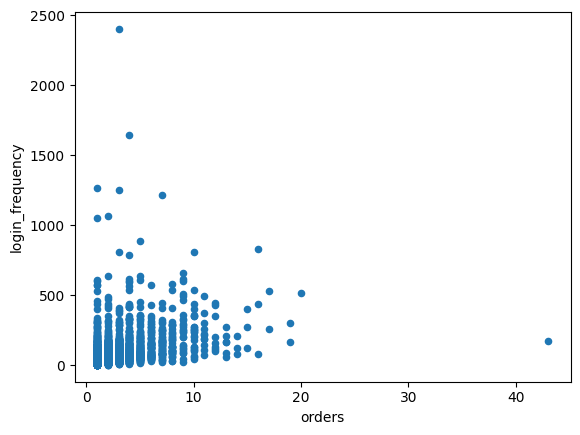

In [ ]:
df[df['year']==2022].plot(x='orders', y = 'login_frequency', kind = 'scatter' )

<Axes: xlabel='orders', ylabel='login_frequency'>

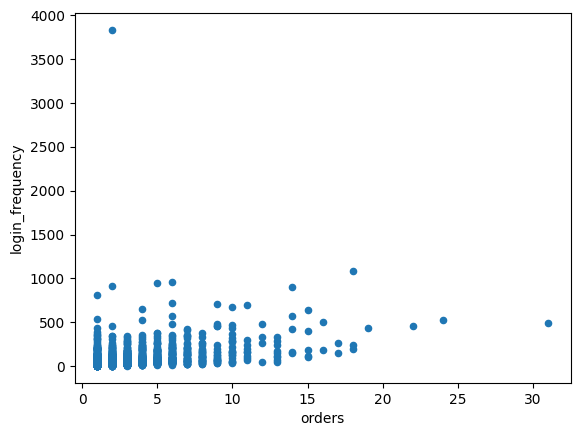

In [ ]:
df[df['year']==2021].plot(x='orders', y = 'login_frequency', kind = 'scatter' )

Хотя коэффициент линейной коррекляции Пирсона лежит в диапазоне от 0,3 до 0,60, что говорит о наличии умеренной положительной обратной связи, визуально точечная диаграмма не подтверждает зависимости

In [ ]:
# df_pivot = df[df['year']==2022].groupby(['login_frequency','orders'], as_index=False).user_id.nunique()
# pd.pivot_table(df_pivot, values=['user_id'], index=['orders'], columns=['login_frequency']).corr().style.background_gradient(cmap='coolwarm')

array([[<Axes: title={'center': 'login_frequency'}>,
        <Axes: title={'center': 'orders'}>]], dtype=object)

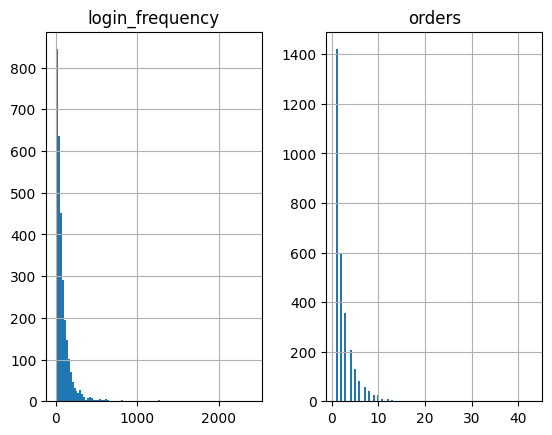

In [ ]:
df[df['year']==2022][['login_frequency', 'orders']].hist(bins=100)

In [ ]:
df[df['year']==2021][['login_frequency','orders']].hist(bins=100)

array([[<Axes: title={'center': 'login_frequency'}>,
        <Axes: title={'center': 'orders'}>]], dtype=object)

# Бонус: построение когортной матрицы в абсолютах (для июля 2022 года)

In [ ]:
dau_daily = login_logs.copy(deep=True)
dau_daily['first_login_date'] = dau_daily.groupby(['user_id'])['login_date'].transform('min')
dau_daily['date_delta']=(dau_daily['login_date']-dau_daily['first_login_date']).dt.days
dau_daily[dau_daily['date_delta'].isin([0,1])]["user_id"]

dau_daily = login_logs.copy(deep=True)
dau_daily['first_login_date'] = dau_daily.groupby(['user_id'])['login_date'].transform('min')
dau_daily['date_delta']=(dau_daily['login_date']-dau_daily['first_login_date']).dt.days
dau_daily = dau_daily.groupby(['first_login_date',
                               'date_delta'], as_index=False).user_id.nunique()
dau_daily = pd.pivot_table(dau_daily[dau_daily['first_login_date'].astype('str')>'2022-01-01'],
                            values='user_id', index=['first_login_date'],
                       columns=['date_delta'], aggfunc="sum")

In [ ]:
import plotly.express as px

fig = px.imshow(dau_daily, x=dau_daily.columns.to_list(), y=dau_daily.index.to_list(),
                color_continuous_scale='Viridis',
                aspect="auto")
fig.update_traces(text=dau_daily, texttemplate="%{text}")
fig.update_yaxes(nticks=dau_daily.shape[1])
fig.update_layout(
    width = 900, height = 900,
    autosize = True )
fig.update_xaxes(side="top", nticks=dau_daily.shape[0])
fig.show()

# Когорты Retention Rate, %:

In [ ]:
dau_daily_rr = pd.DataFrame()
for i in dau_daily:
  dau_daily_rr.loc[:,i]=(dau_daily.loc[:,i]/dau_daily.loc[:,0]*100.0).round(2)


import plotly.express as px

fig = px.imshow(dau_daily_rr, x=dau_daily.columns.to_list(), y=dau_daily.index.to_list(),
                color_continuous_scale='Viridis',
                aspect="auto")
fig.update_traces(text=dau_daily_rr, texttemplate="%{text}")
fig.update_yaxes(nticks=dau_daily_rr.shape[1])
fig.update_layout(
    width = 900, height = 900,
    autosize = True )
fig.update_xaxes(side="top", nticks=dau_daily_rr.shape[0])
fig.show()

In [ ]:
dau_daily_rr = pd.DataFrame()
for i in dau_daily:
  dau_daily_rr.loc[:,i]=(dau_daily.loc[:,i]/dau_daily.loc[:,0]*100.0).round(2)


import plotly.express as px

fig = px.imshow(dau_daily_rr, x=dau_daily.columns.to_list(), y=dau_daily.index.to_list(),
                color_continuous_scale='Viridis',
                aspect="auto")
fig.update_traces(text=dau_daily_rr, texttemplate="%{text}")
fig.update_yaxes(nticks=dau_daily_rr.shape[1])
fig.update_layout(
    width = 900, height = 900,
    autosize = True )
fig.update_xaxes(side="top", nticks=dau_daily_rr.shape[0])
fig.show()

Построить графики можно также в Matplotlib

<Axes: xlabel='date_delta', ylabel='first_login_date'>

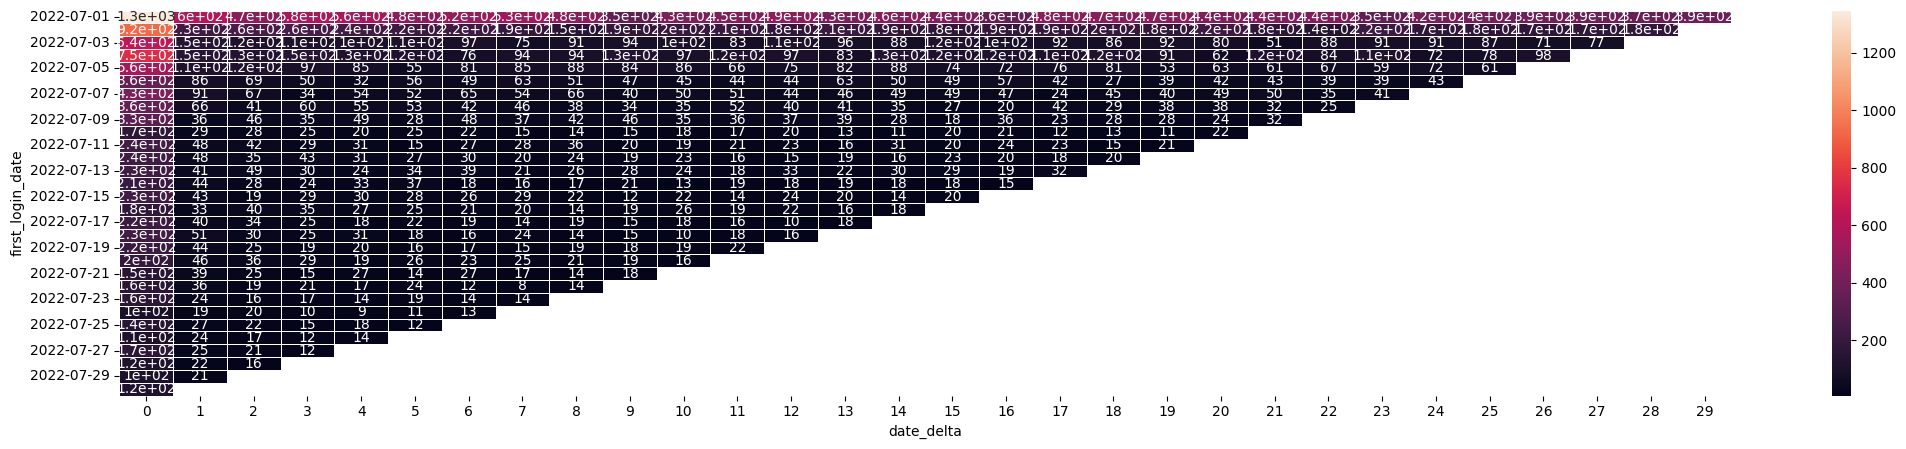

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(26,5))
import seaborn as sns
sns.heatmap(dau_daily, annot=True, linewidth=.5)

<Axes: ylabel='first_login_date'>

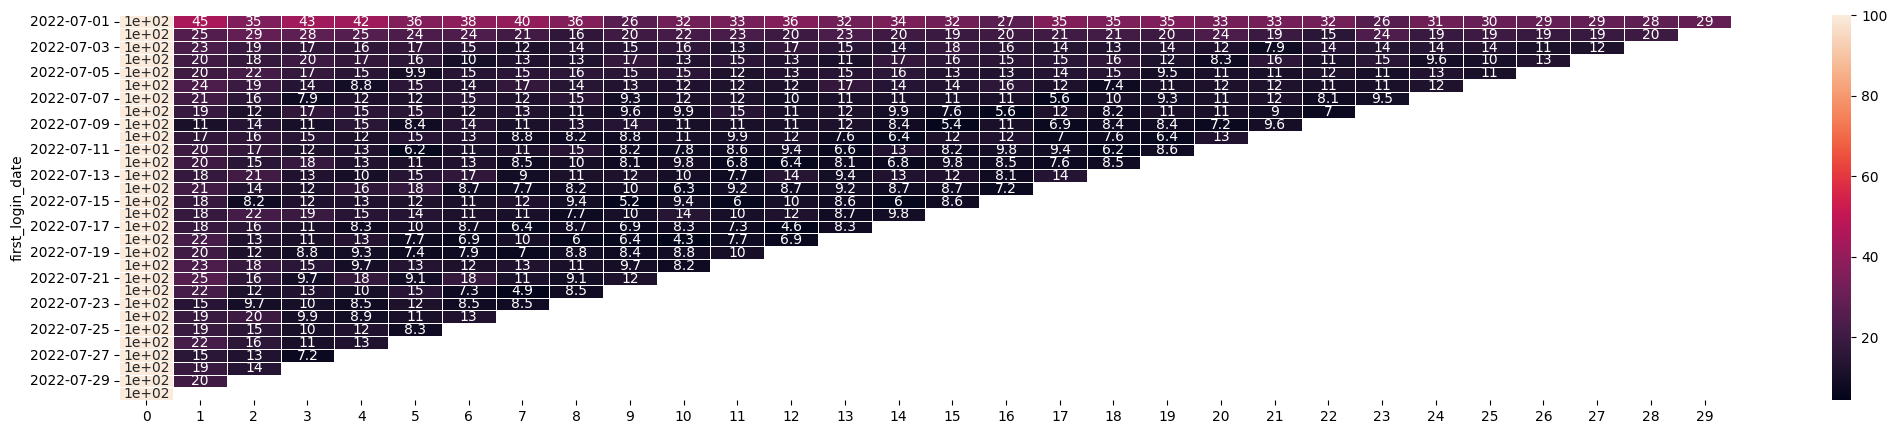

In [ ]:
plt.figure(figsize=(26,5))
sns.heatmap(dau_daily_rr, annot=True, linewidth=.5)

**sales_orders_items**:

•	order_item_id - идентификатор строки заказа (первичный ключ таблицы)

•	fk_product_id - артикул товара

•	fk_order_id - номер заказа

•	ordered_quantity - количество единиц товара в заказе

•	order_quantity_accepted - колиечество единиц товара, доставленных покупателю

•	rate - цена

**login_logs**:

•	login_log_id - идентификатор строки таблицы с логами авторизации пользователей (первичный ключ таблицы)

•	user_id - идентификатор пользователя

•	login_time - дата и время авторизации

**sales_orders**:

•	order_id - номер заказа (первичный ключ таблицы)

•	fk_buyer_id - идентификатор покупателя

•	fk_depot_id - идентификатор склада

•	sales_order_status - статус заказа

•	creation_time - дата и время создания заказа
